In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [147]:
sns.set_style("whitegrid")

In [157]:
pa = '../results/vera/results/xception64_[100]_0.01__boxes/runs/[100]_0.01/1622247867.40133/'
event_acc = EventAccumulator(pa)
event_acc.Reload()
# Show all tags in the log file
print(event_acc.Tags())
print(event_acc.Tags()['scalars'])


{'images': ['predicted_rain_rate', 'reference_rain_rate', 'input_channel', 'Calibration', 'ScatterPlot'], 'audio': [], 'histograms': [], 'scalars': ['Learning rate', 'training_loss', 'validation_loss', 'MSE', 'Bias', 'CRPS'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
['Learning rate', 'training_loss', 'validation_loss', 'MSE', 'Bias', 'CRPS']


In [158]:
ke = event_acc.Tags()['scalars'][0]
w_times, step_nums, vals = zip(*event_acc.Scalars(ke))
df = pd.DataFrame({'w_times': w_times, 'step_nums': step_nums, ke: vals})
for ke in event_acc.Tags()['scalars'][1:]:
    print(ke)
    __, __, vals = zip(*event_acc.Scalars(ke))
    df_tmp = pd.DataFrame({ke: vals})
    df = pd.concat([df, df_tmp], axis=1)
df

training_loss
validation_loss
MSE
Bias
CRPS


,w_times,step_nums,Learning rate,training_loss,validation_loss,MSE,Bias,CRPS
0,1.622248e+09,1,0.010000,0.077706,0.068774,104.020737,-0.117138,-0.066640
1,1.622248e+09,2,0.009998,0.068113,0.064251,109.457787,-0.042500,0.092797
2,1.622248e+09,3,0.009990,0.066475,0.073065,103.993126,-0.134403,0.019510
3,1.622248e+09,4,0.009978,0.066519,0.067510,104.771812,-0.108209,0.063814
4,1.622248e+09,5,0.009961,0.063023,0.065227,105.282471,-0.094579,0.059403
...,...,...,...,...,...,...,...,...
95,1.622253e+09,96,0.000062,0.047326,0.049140,138.684586,-0.007896,0.091621
96,1.622253e+09,97,0.000039,0.047513,0.049147,139.094574,-0.006894,0.091745
97,1.622253e+09,98,0.000022,0.048116,0.049178,138.583664,-0.010145,0.091544
98,1.622253e+09,99,0.000010,0.048529,0.049144,135.979675,-0.012724,0.091375


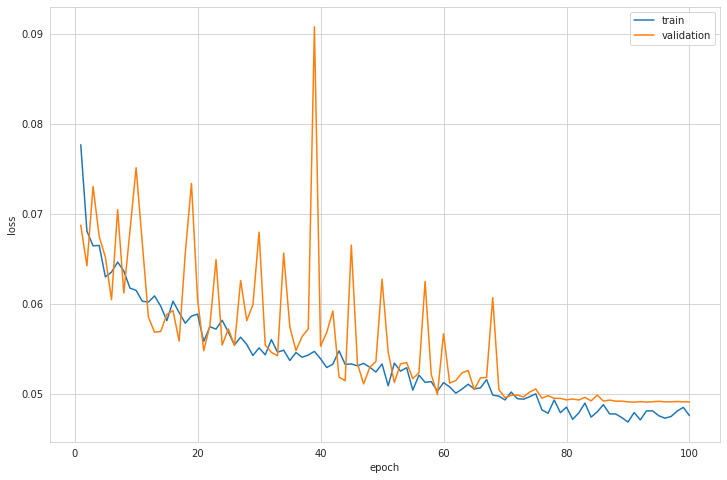

In [172]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.step_nums, df.training_loss, label='train')
ax.plot(df.step_nums, df.validation_loss, label='validation')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend()

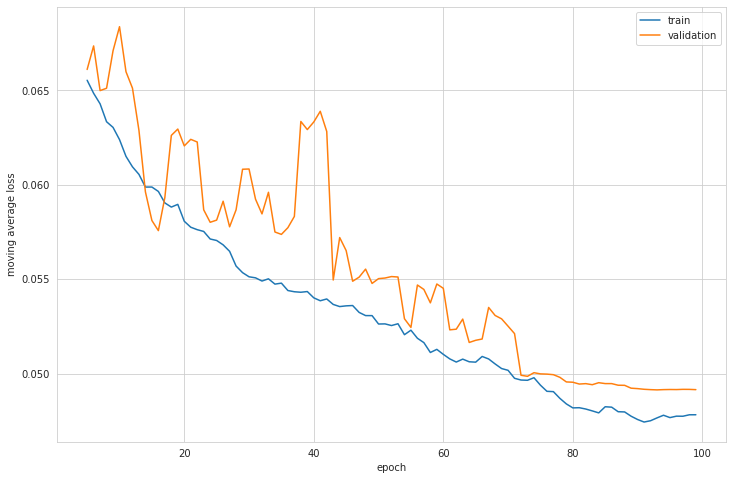

In [171]:
fig, ax = plt.subplots(figsize=(12,8))
N = 5
ax.plot(df.training_loss.rolling(window=N).mean()[N:], label='train')
ax.plot(df.validation_loss.rolling(window=N).mean()[N:], label='validation')
ax.set_ylabel('moving average loss')
ax.set_xlabel('epoch')
ax.legend()

Text(0.5, 0, 'epoch')

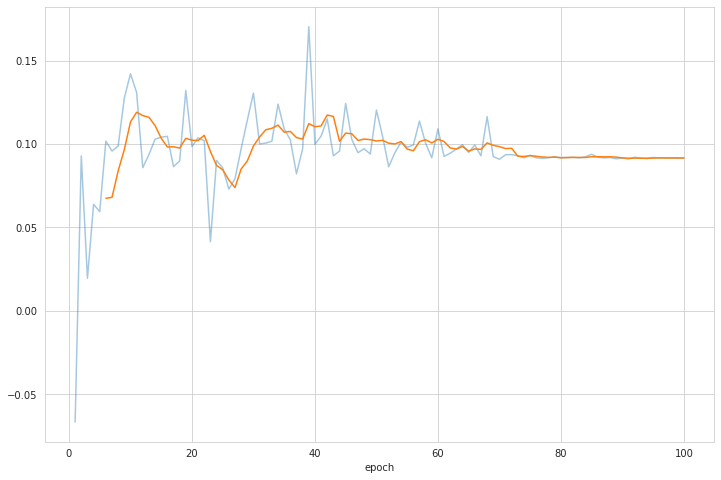

In [175]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.step_nums, df.CRPS, alpha=0.4)
ax.plot(df.step_nums[N:], df.CRPS.rolling(window=N).mean()[N:])
ax.set_xlabel('epoch')

Text(0.5, 0, 'epoch')

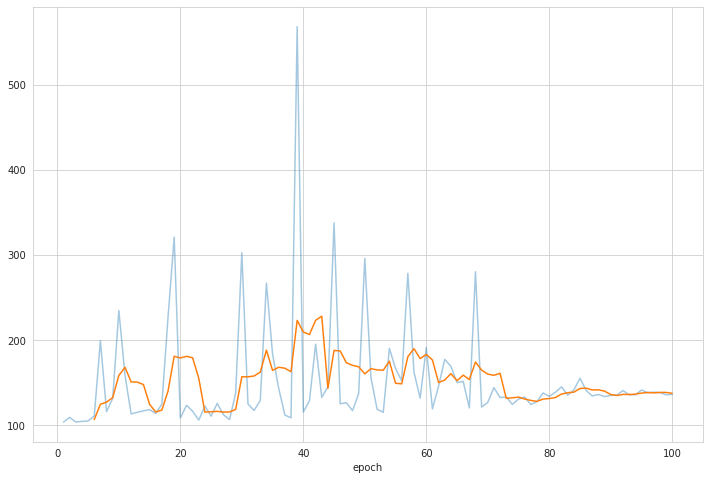

In [176]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.step_nums, df.MSE, alpha=0.4)
ax.plot(df.step_nums[N:], df.MSE.rolling(window=N).mean()[N:])
ax.set_xlabel('epoch')

Text(0.5, 0, 'epoch')

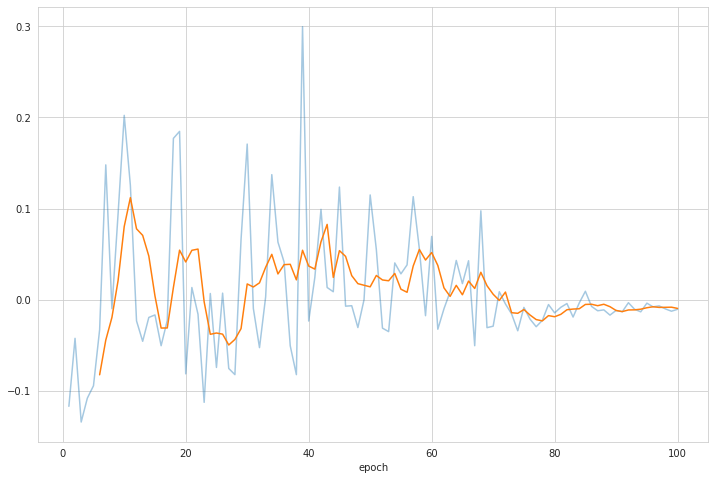

In [177]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.step_nums, df.Bias, alpha=0.4)
ax.plot(df.step_nums[N:], df.Bias.rolling(window=N).mean()[N:])
ax.set_xlabel('epoch')

In [180]:
df.Bias

0    -0.117138
1    -0.042500
2    -0.134403
3    -0.108209
4    -0.094579
        ...   
95   -0.007896
96   -0.006894
97   -0.010145
98   -0.012724
99   -0.010609
Name: Bias, Length: 100, dtype: float64